# Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
population_profit_data = pd.read_csv('ex1data1.txt', sep=",", header=None)
population_profit_data.columns = ["Population", "Profit"]

In [3]:
population_profit_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
population_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


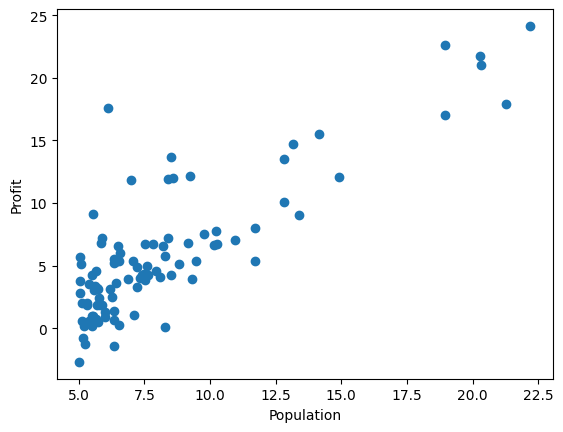

In [5]:
plt.scatter(population_profit_data['Population'], population_profit_data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

# Univariate linear regression

In [6]:
def compute_cost(X, y, theta) -> float:
    m = y.shape[0]
    J = np.dot((np.dot(X, theta) - y).transpose(), (np.dot(X, theta) - y)) / (2 * m)
    return float(J)

In [7]:
theta_0 = 0
theta_1 = 0

theta = np.resize(np.array([theta_0, theta_1]), (2, 1))
y = np.resize(np.array(population_profit_data['Profit']), (97, 1))

X = np.array([[1, i] for i in population_profit_data['Population']])

In [8]:
if round(compute_cost(X, y, theta), 2) == 32.07:
    print('The function COMPUTE_COST check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function COMPUTE_COST check was SUCCESSFUL!


In [9]:
def gradient_descent(X, y, theta, alpha, iters):    
    m = y.shape[0]
    J_iters = []
    
    for i in range(iters):
        theta = theta - ((alpha / m) * X.transpose()).dot((X.dot(theta)) - y)
        
        J_iters.append(compute_cost(X, y, theta))
        
    return np.around(theta, 2), J_iters

In [10]:
theta_new, J_iters = gradient_descent(X, y, theta, alpha=0.01, iters=1000)

In [11]:
if theta_new[0] == -3.24 and theta_new[1] == 1.13:
    print('The function GRADIENT_DESCENT check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function GRADIENT_DESCENT check was SUCCESSFUL!


In [12]:
print(f'The value of the target function now: {compute_cost(X, y, theta_new)}')

The value of the target function now: 4.516418766732299


In [13]:
def h(x, theta_0, theta_1):
    return theta_0 + (theta_1 * x)

X_axes = [min(population_profit_data['Population']), max(population_profit_data['Population'])]
y_axes = [h(min(population_profit_data['Population']), theta_new[0], theta_new[1]),
          h(max(population_profit_data['Population']), theta_new[0], theta_new[1])]

In [14]:
def data_plot_with_linear_regression(data, X, y):
    plt.scatter(data['Population'], data['Profit'])
    plt.plot(X, y, color='g')
    plt.title('Data plot with linear regression')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.show()

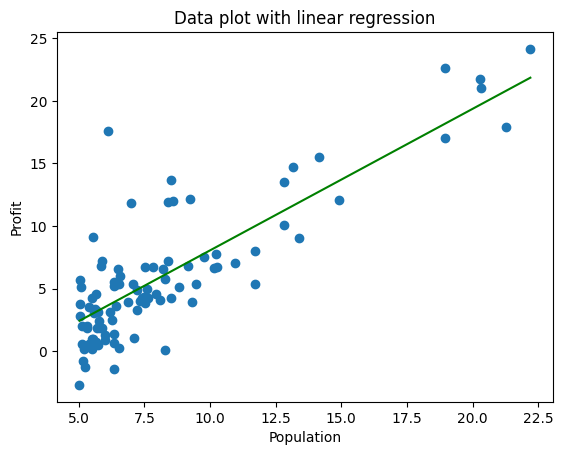

In [15]:
data_plot_with_linear_regression(population_profit_data, X_axes, y_axes)

In [16]:
def plot_dependence_target_func_on_iters(J_iters):
    plt.plot(J_iters)
    plt.title('Plot of the dependence of the target function on the number of iterations')
    plt.xlabel('Iterations')
    plt.ylabel('The values of the target function')
    plt.show()

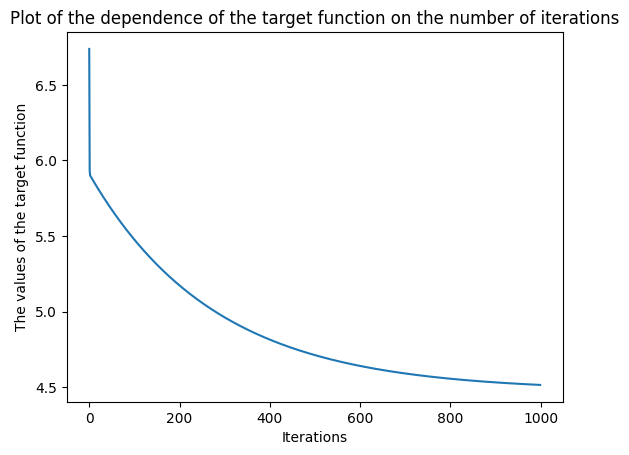

In [17]:
plot_dependence_target_func_on_iters(J_iters)

In [18]:
def experiment_with_different_values(alphas_list, iters_list, X, y, theta):
    values_of_target_function = []
    result_iters = []
    result_alphas = []
    
    for alpha in alphas_list:
        for iters in iters_list:
            _, J_iters = gradient_descent(X, y, theta, alpha, iters)
            
            result_iters.append(iters)
            result_alphas.append(alpha)
            values_of_target_function.append(round(J_iters[-1],2))
            
    results = {'iters': result_iters, 'alpha': result_alphas, 'value of target function': values_of_target_function}
    
    return results

In [19]:
alphas_list = [0.00001, 0.0001, 0.001, 0.01]
iters_list = [10, 100, 1000, 10000]

results_of_experiment = experiment_with_different_values(alphas_list, iters_list, X, y, theta)

table_with_results = pd.DataFrame(data=results_of_experiment)

table_with_results

,iters,alpha,value of target function
0,10,0.00001,31.65
1,100,0.00001,28.10
2,1000,0.00001,10.96
3,10000,0.00001,5.86
4,10,0.00010,28.09
5,100,0.00010,10.93
6,1000,0.00010,5.86
7,10000,0.00010,5.48
8,10,0.00100,10.61
9,100,0.00100,5.86


In [20]:
table_with_results[table_with_results['value of target function'] < 4.516]

,iters,alpha,value of target function
15,10000,0.01,4.48


## The class for the complete solution of this task at different parameters

In [21]:
class LinearRegression:    
    def __init__(self, data, alpha=0.01, iters=1000, thetas=[0,0]):
        self.data = data
        self.alpha = alpha
        self.iters = iters
        self.thetas = thetas
        self.X = None
        self.y = None
        self.J_iters = None
        
        self.parse_data()
        
    def parse_data(self):
        self.thetas = np.resize(np.array([theta for theta in self.thetas]), (len(self.thetas), 1))
        self.y = np.resize(np.array(self.data[self.data.columns[-1]]), (self.data.shape[0], 1))
        
        self.X = np.array(self.data[self.data.columns[:-1]])
        ones_vector = np.resize(np.array([1 for _ in self.data.columns[-1]]), (self.data.shape[0], 1))               
        self.X = np.hstack((ones_vector,self.X))
        
        return self.X, self.y
        
    def compute_cost(self) -> float:
        m = self.y.shape[0]
        J = np.dot((np.dot(self.X, self.thetas) - self.y).transpose(), (np.dot(self.X, self.thetas) - self.y)) / (2 * m)
        return float(J)
        
    def __gradient_descent(self):    
        m = self.y.shape[0]
        J_iters = []
        
        for i in range(self.iters):
            self.thetas = self.thetas - ((self.alpha / m) * self.X.transpose()).dot((self.X.dot(self.thetas)) - self.y)
            J_iters.append(self.compute_cost())

        self.thetas = np.around(self.thetas, 2) 
        self.J_iters = J_iters
        
    def __linear_function(self, X_point, y_point):
        if len(self.thetas) == 2:
            return float(self.thetas[0] + (self.thetas[1] * X_point))
        if len(self.thetas) == 3:
            return float(self.thetas[0] + (self.thetas[1] * X_point) + (self.thetas[2] * y_point))
    
    def __get_points_for_linear_function(self):        
        if len(self.thetas) == 2:
            X_axes = [min(self.data.iloc[:, 0]), max(self.data.iloc[:, 0])]
            y_axes = [self.__linear_function(X_axes[0], _),
                      self.__linear_function(X_axes[1], _)]
            return X_axes, y_axes 
            
        elif len(self.thetas) == 3: 
            X_axes = np.array(self.data.iloc[:, 0])
            y_axes = np.array(self.data.iloc[:, 1])
            z_axes = np.array([self.__linear_function(X_axes[i], y_axes[i]) for i in range(len(X_axes))])
            return X_axes, y_axes, z_axes
    
    def data_plot_with_linear_regression(self):
        if len(self.thetas) == 2:
            X, y = self.__get_points_for_linear_function()
            plt.scatter(self.data.iloc[:, 0], self.data[self.data.columns[-1]])
            plt.plot(X, y, color='g')
            plt.title('Data plot with linear regression')
            plt.xlabel(self.data.columns[0])
            plt.ylabel(self.data.columns[1])
            plt.show()
            
        elif len(self.thetas) == 3:
            x = self.data.iloc[:, 0]
            y = self.data.iloc[:, 1]
            z = self.data.iloc[:, 2]
            
            plane_x, plane_y, plane_z = self.__get_points_for_linear_function()
            
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot_trisurf(plane_x, plane_y, plane_z)
            ax.scatter(x, y, z)
            ax.set_xlabel(self.data.columns[0])
            ax.set_ylabel(self.data.columns[1])
            ax.set_zlabel(self.data.columns[2])
        else:
            print('Sorry, can\'t show data plot with linear regression.')
    
    def __plot_dependence_target_func_on_iters(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.J_iters)
        plt.title('Plot of the dependence of the target function on the number of iterations')
        plt.xlabel('Iterations')
        plt.ylabel('The values of the target function')
        plt.show()
        
    def get_solution(self):
        self.__gradient_descent()
        print(f'The final value of the target function: {self.J_iters[-1]}')
        
        self.data_plot_with_linear_regression()
        self.__plot_dependence_target_func_on_iters()
            
        return

## Task solution with alpha = 0.001

The final value of the target function: 5.480269332020323


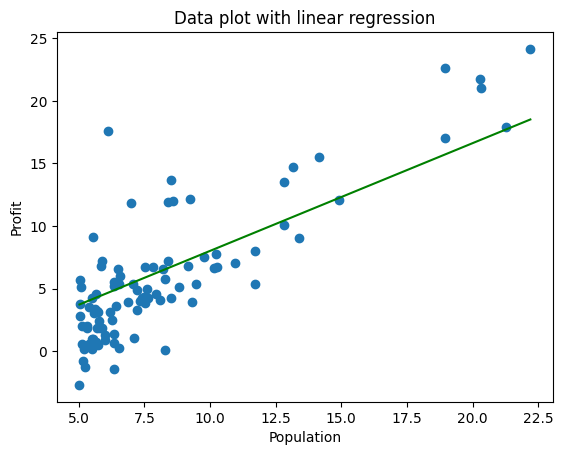

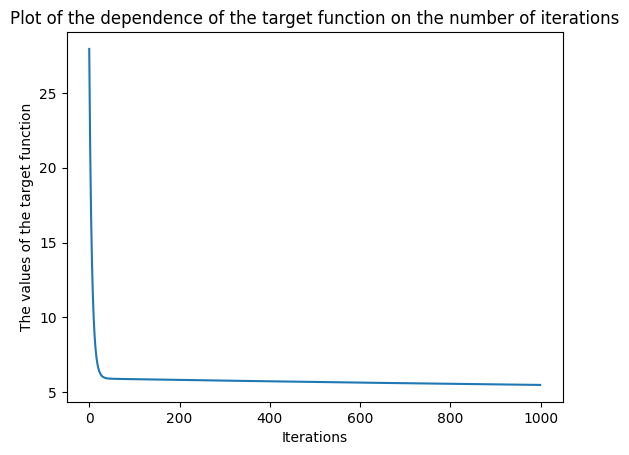

In [22]:
LinearRegression(data=population_profit_data, alpha=0.001, iters=1000, thetas = [0, 0]).get_solution()

## Task solution with alpha = 0.05

The final value of the target function: 1.0063066407904806e+100


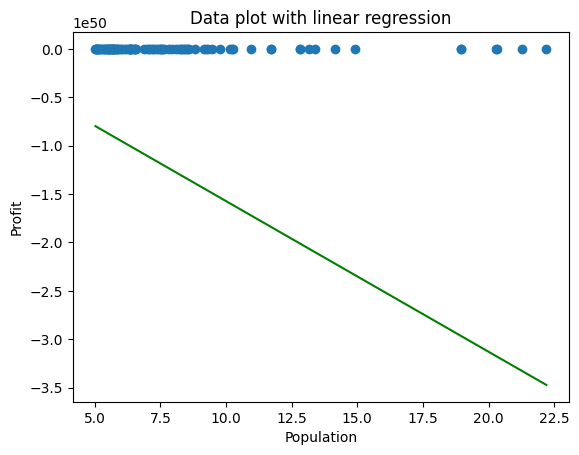

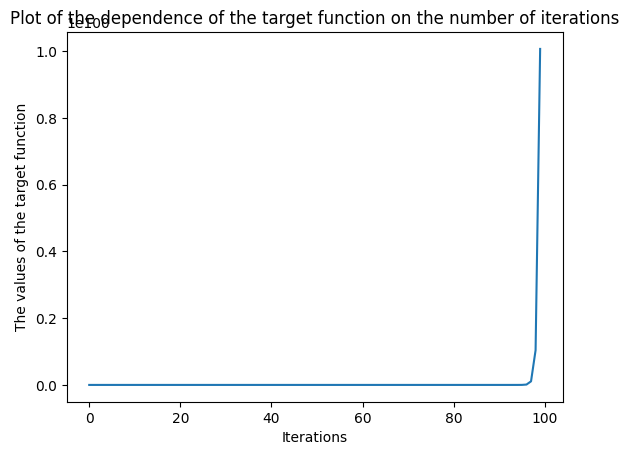

In [23]:
LinearRegression(data=population_profit_data, alpha=0.05, iters=100, thetas=[0, 0]).get_solution()

## Multiple linear regression

In [24]:
data = pd.read_csv('ex1data2.txt', sep=",", header=None)
data.columns = ["Size", "Bedrooms", "Price"]

In [25]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [27]:
def normalize_data(data):
    columns = data.columns
    
    normalized_data = data.copy()
    
    for column in columns:
        mean = np.mean(data[column])
        std = np.std(data[column])

        for i in range(len(data[column])):
            normalized_data[column][i] = (data[column][i] - mean) / std
        
    return normalized_data

In [28]:
price_data = normalize_data(data)

In [29]:
price_data.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


The final value of the target function: 0.13354178879075573


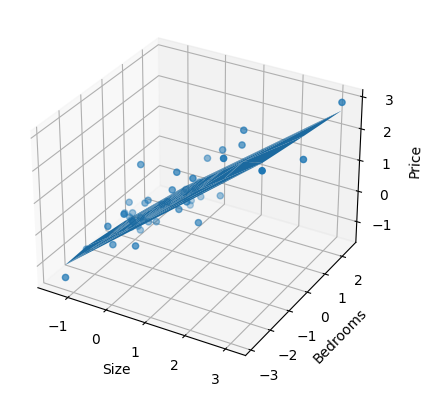

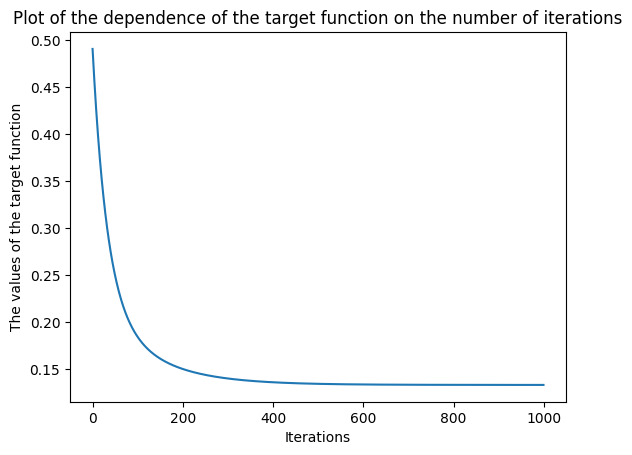

In [30]:
LinearRegression(data=price_data, alpha=0.01, iters=1000, thetas=[0, 0, 0]).get_solution()

## Task solution with alpha = 0.05, iters = 1000

The final value of the target function: 0.13352749098554287


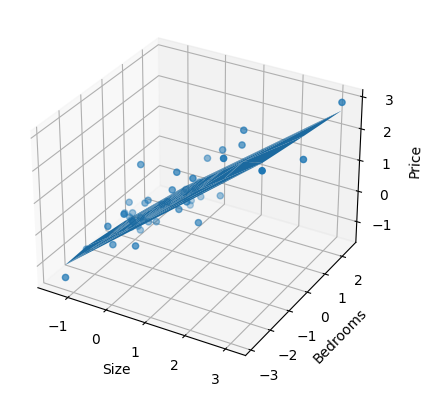

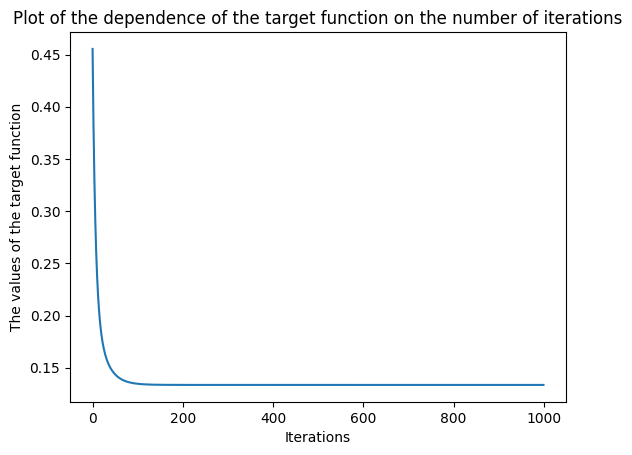

In [31]:
LinearRegression(data=price_data, alpha=0.05, iters=1000, thetas = [0, 0, 0]).get_solution()

## Linear Regression in sklearn

In [32]:
from sklearn import linear_model
model_for_profit_prediction = linear_model.LinearRegression()

X = np.array(population_profit_data['Population']).reshape(-1, 1)
y = np.array(population_profit_data['Profit'])

model_for_profit_prediction.fit(X, y)

LinearRegression()

In [33]:
f = model_for_profit_prediction.predict(X)

In [34]:
def data_plot_with_linear_regression(data, X, f):
    if X.shape[1] == 1:
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
        plt.plot(data.iloc[:, 0], f, color='g')
        
        plt.title('Data plot with linear regression')
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
        
        plt.show()

    elif X.shape[1] == 2:
        x = data.iloc[:, 0]
        y = data.iloc[:, 1]
        z = data.iloc[:, 2]

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(x, y, f)
        ax.scatter(x, y, z)
        ax.set_xlabel(data.columns[0])
        ax.set_ylabel(data.columns[1])
        ax.set_zlabel(data.columns[2])

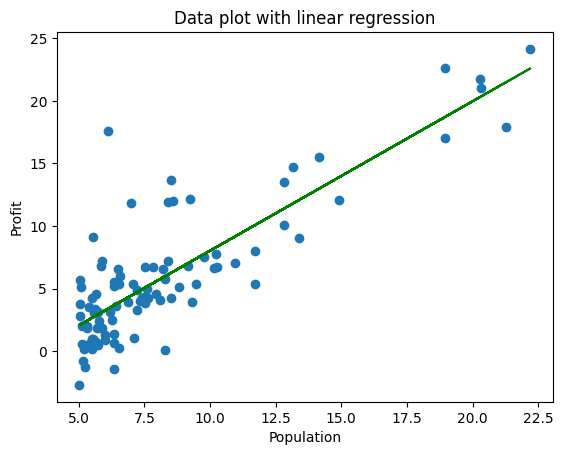

In [35]:
data_plot_with_linear_regression(population_profit_data, X, f)

In [36]:
model_for_price_prediction = linear_model.LinearRegression()

X = np.array(price_data.iloc[:, 0:2]).reshape(-1, 2)
y = np.array(price_data.iloc[:, 2])

model_for_price_prediction.fit(X, y)

LinearRegression()

In [37]:
f = model_for_price_prediction.predict(X)

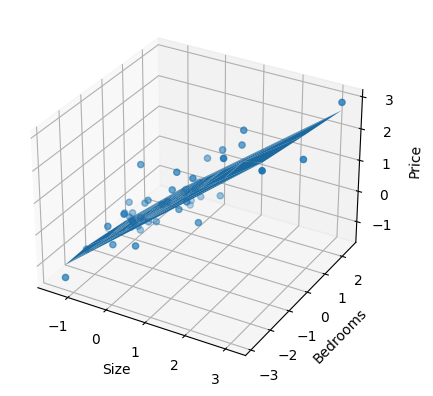

In [38]:
data_plot_with_linear_regression(price_data, X, f)